In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import cluster
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Load your dataset
data = pd.read_csv('Crop_recommendation_Dataset.csv')

In [3]:
# Extract the features for clustering (N, P, K, temperature, humidity, ph, rainfall)
features = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

In [4]:
# Standardize the features (optional but often recommended)
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [5]:
# Set the number of clusters (c) to 20
c = 20

In [6]:
# Set the fuzziness parameter (m)
m = 2.0  # You can adjust this based on your data

In [7]:
# Perform FCM clustering
cntr, U, _, _, _, _, _ = fuzz.cluster.cmeans(
    features.T, c, m, error=0.005, maxiter=1000, init=None
)

In [8]:
# Assign data points to clusters based on U
cluster_assignments = np.argmax(U, axis=0)

In [9]:
# Add the cluster assignments as a new column in your original dataset
data['cluster'] = cluster_assignments

# Now, you can analyze the results, and each cluster represents a different crop.

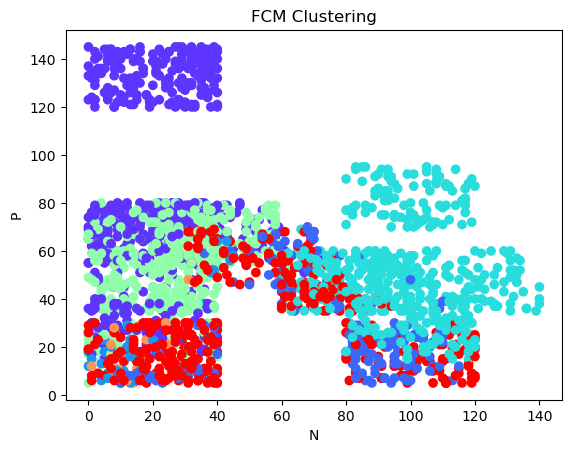

In [10]:
# Extract relevant features for the scatter plot (e.g., N and P)
x = data['N']
y = data['P']
cluster_assignments = data['cluster']

plt.scatter(x, y, c=cluster_assignments, cmap='rainbow')
plt.xlabel('N')
plt.ylabel('P')
plt.title('FCM Clustering')
plt.show()


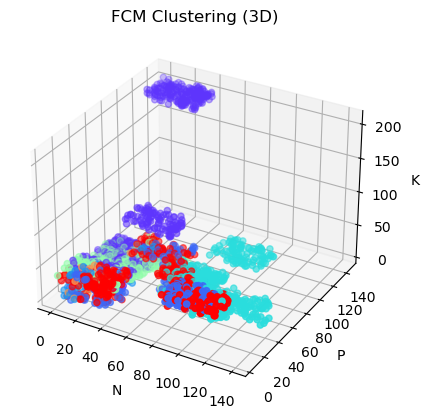

In [11]:
# Extract relevant features for the 3D scatter plot (e.g., N, P, and K)
x = data['N']
y = data['P']
z = data['K']
cluster_assignments = data['cluster']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=cluster_assignments, cmap='rainbow')
ax.set_xlabel('N')
ax.set_ylabel('P')
ax.set_zlabel('K')
plt.title('FCM Clustering (3D)')
plt.show()

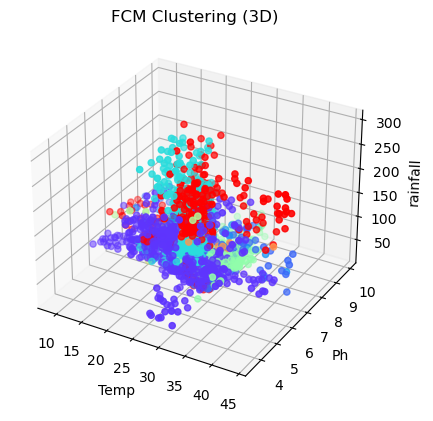

In [15]:
x = data['temperature']
y = data['ph']
z = data['rainfall']
cluster_assignments = data['cluster']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=cluster_assignments, cmap='rainbow')
ax.set_xlabel('Temp')
ax.set_ylabel('Ph')
ax.set_zlabel('rainfall')
plt.title('FCM Clustering (3D)')
plt.show()


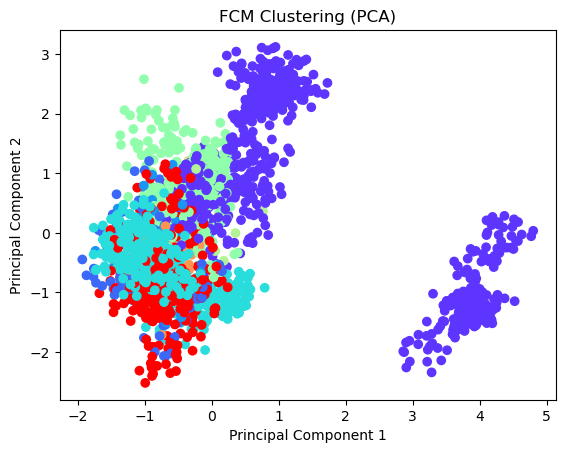

In [12]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
data['PC1'] = pca_result[:, 0]
data['PC2'] = pca_result[:, 1]

x = data['PC1']
y = data['PC2']
cluster_assignments = data['cluster']

plt.scatter(x, y, c=cluster_assignments, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('FCM Clustering (PCA)')
plt.show()


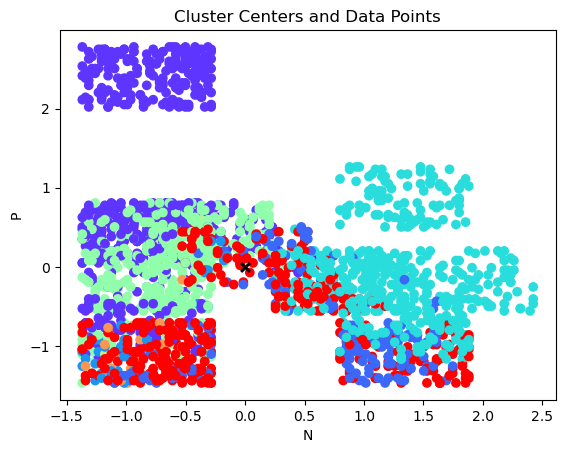

In [13]:
cluster_centers = cntr
plt.scatter(features[:, 0], features[:, 1], c=cluster_assignments, cmap='rainbow')
plt.scatter(cluster_centers[0], cluster_centers[1], c='black', marker='x')
plt.xlabel('N')
plt.ylabel('P')
plt.title('Cluster Centers and Data Points')
plt.show()


In [14]:
# Create an empty 1D array to store user input data
new_data_point = np.zeros(7)

# Get input for each feature from the user
new_data_point[0] = float(input("Enter N: "))
new_data_point[1] = float(input("Enter P: "))
new_data_point[2] = float(input("Enter K: "))
new_data_point[3] = float(input("Enter temperature: "))
new_data_point[4] = float(input("Enter humidity: "))
new_data_point[5] = float(input("Enter ph: "))
new_data_point[6] = float(input("Enter rainfall: "))

# Calculate membership scores
new_data_membership = fuzz.cluster.cmeans_predict(
    np.array([new_data_point]), cntr, m, error=0.005, maxiter=1000)

# Normalize the membership scores
new_data_membership = new_data_membership / np.sum(new_data_membership)

# Find the cluster with the highest membership score
assigned_cluster = np.argmax(new_data_membership)

# Display the assigned cluster and membership scores
print(f"The input data point is assigned to cluster {assigned_cluster}.")
print(f"Membership scores: {new_data_membership}")

ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)